In [1]:
# 일단 2015데이터로 학습, 예측

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
sigungu = pd.read_csv(path+'sigungu_imp_10.csv', encoding='cp949')
sigungu_2 = pd.read_csv(path+'imp_시군구별지역안전지표_2014.csv', encoding='cp949')

In [4]:
sigungu_y = sigungu.iloc[:,-7:] #등급(binary) - 15년, 14년도 
sigungu_x_15 = sigungu.iloc[:,4:-7] #독립변수X - 15년 
sigungu_name_15 = sigungu.iloc[:,:4] #이름 - 15년
sigungu_x_14 = sigungu_2.iloc[:,3:]
sigungu_name_14 = sigungu_2.iloc[:,:3]

In [5]:
sigungu_y.columns = ['fire','transport','disaster','crime','accident','suicide','infection']

### 표준화

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
sigungu_x_14scaled = scaler.fit_transform(sigungu_x_14)
sigungu_x_15scaled = scaler.fit_transform(sigungu_x_15)

In [7]:
sigungu_x_14scaled = pd.DataFrame(data = sigungu_x_14scaled)
sigungu_x_15scaled = pd.DataFrame(data = sigungu_x_15scaled)
sigungu_x_14scaled.columns = sigungu_x_14.columns
sigungu_x_15scaled.columns = sigungu_x_15.columns
sigungu_x_14scaled.shape,sigungu_x_15scaled.shape

((226, 144), (226, 144))

### 스코어함수들
    * 상위 3개함수를 한번에 보는 score(model,x,y,pred)함수
    - kfold_crossvalscore(): kfold의 평균 스코어들을 한번에 출력되도록 함
    - metric_score(): 분류메트릭을 이용한 스코어들을 한번에 출력되도록 함
    - confusion_matrix(y, pred)
    
    - paper(): 얼만큼 맞췄는지 확인해보려고
    - classification report
    - model.score()
    
    *한번에 roc커브 그리기

In [8]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(3, shuffle=True, random_state=0)
def KFold_meanscore(ary):
    tot = 0
    for i in ary:
        tot += i
    return tot/len(ary),ary
def kfold_crossvalscore(model, X, y, cv=cv):
    ary1 = cross_val_score(model, X, y, cv=cv, scoring='f1', verbose=0)
    ary2 = cross_val_score(model, X, y, cv=cv, scoring='accuracy', verbose=0)
    ary3 = cross_val_score(model, X, y, cv=cv, scoring='precision', verbose=0)
    ary4 = cross_val_score(model, X, y, cv=cv, scoring='recall', verbose=0)
    print(f'f1-score:{KFold_meanscore(ary1)}')
    print(f'accuracy:{KFold_meanscore(ary2)}')
    print(f'precision:{KFold_meanscore(ary3)}')
    print(f'recall:{KFold_meanscore(ary4)}')

In [9]:
#metiric
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def metric_score(y, pred):
    print(f'f1 :\t\t{f1_score(y,pred)}')
    print(f'accuracy :\t{accuracy_score(y,pred)}')
    print(f'precision :\t{precision_score(y, pred)}')
    print(f'recall :\t{recall_score(y, pred)}')

In [10]:
#confusion matrix
def confusion_matrix(y,pred):
    confusion_matrix = pd.crosstab(y, pred, rownames=['True'], colnames=['Predicted'], margins=True)
    return confusion_matrix

In [11]:
#위 세개함수를 한번에 출력
def score(model, x, y, pred):
    print('[metric score]\n\n',metric_score(y,pred))
    print('[kfold crossvalscore]\n\n',kfold_crossvalscore(model,x,y))
    return confusion_matrix(y,pred)

In [12]:
#정답지
def paper(y, pred):
    a = pd.DataFrame(data=pred,columns=['예측'])
    b = pd.DataFrame(data=y)
    return pd.concat([a,b],axis=1)

In [13]:
#추가사용: classification report
from sklearn.metrics import classification_report
# print(classification_report(sido_y.fire,pred_mlp, target_names=['123','45']))

In [14]:
# 추가사용: model.score(x,y)
# mlp.score(sigungu_x_15scaled, sigungu_y.fire)

In [15]:
#사용모델 import
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
import copy

# model: MLP

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(50,30))
mlp.fit(sigungu_x_15scaled, sigungu_y.fire) #15스케일로학습
pred_mlp = mlp.predict(sigungu_x_14scaled) #14스케일로예측

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
score(mlp, sigungu_x_14scaled, sigungu_y.fire, pred_mlp)

f1 :		0.6918918918918919
accuracy :	0.7477876106194691
precision :	0.6095238095238096
recall :	0.8
[metric score]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklea

f1-score:(0.6078772469780097, array([0.60377358, 0.66666667, 0.55319149]))
accuracy:(0.6814619883040937, array([0.67105263, 0.72      , 0.65333333]))
precision:(0.6151282051282052, array([0.61538462, 0.68      , 0.55      ]))
recall:(0.5851499118165785, array([0.59259259, 0.64285714, 0.52      ]))
[kfold crossvalscore]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted,0,1,All
True,,,
0,105,41,146
1,16,64,80
All,121,105,226


# RFC

In [18]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_rfc = rfc.predict(sigungu_x_14scaled)

In [19]:
score(rfc, sigungu_x_14scaled, sigungu_y.fire, pred_rfc)

f1 :		0.6794871794871794
accuracy :	0.7787610619469026
precision :	0.6973684210526315
recall :	0.6625
[metric score]

 None
f1-score:(0.48481711525189786, array([0.47619048, 0.47826087, 0.5       ]))
accuracy:(0.6858479532163743, array([0.68421053, 0.69333333, 0.68      ]))
precision:(0.5892857142857143, array([0.625     , 0.64285714, 0.5       ]))
recall:(0.32195767195767194, array([0.44444444, 0.32142857, 0.2       ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,123,23,146
1,27,53,80
All,150,76,226


# XGB

In [20]:
xgb = XGBClassifier(max_depth=10, n_estimators=200, learning_rate=0.01)
xgb.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_xgb = xgb.predict(sigungu_x_14scaled)

In [21]:
score(xgb, sigungu_x_14scaled, sigungu_y.fire, pred_xgb)

f1 :		0.5697674418604651
accuracy :	0.672566371681416
precision :	0.532608695652174
recall :	0.6125
[metric score]

 None
f1-score:(0.514766201804758, array([0.5       , 0.56603774, 0.47826087]))
accuracy:(0.6858479532163743, array([0.68421053, 0.69333333, 0.68      ]))
precision:(0.565079365079365, array([0.57142857, 0.6       , 0.52380952]))
recall:(0.4733862433862434, array([0.44444444, 0.53571429, 0.44      ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,103,43,146
1,31,49,80
All,134,92,226


# LGBM

In [22]:
import copy#lgbm은 아스키 코드값만 입력받기 때문에 한글을 다 숫자로 바뀌주기
lgbm_sigungu = b = copy.deepcopy(sigungu_x_14scaled) 
lgbm_sigungu.columns = list(range(144))
lgbm= LGBMClassifier(n_estimators=200,num_boost_round =500,learning_rate =0.01)
lgbm.fit(lgbm_sigungu, sigungu_y.fire)
pred_lgbm = lgbm.predict(sigungu_x_14scaled)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [23]:
score(lgbm, lgbm_sigungu, sigungu_y.fire , pred_lgbm)

f1 :		1.0
accuracy :	1.0
precision :	1.0
recall :	1.0
[metric score]

 None


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


f1-score:(0.5140088669500434, array([0.53846154, 0.54901961, 0.45454545]))
accuracy:(0.6858479532163743, array([0.68421053, 0.69333333, 0.68      ]))
precision:(0.5650038138825324, array([0.56      , 0.60869565, 0.52631579]))
recall:(0.4728395061728395, array([0.51851852, 0.5       , 0.4       ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,146,0,146
1,0,80,80
All,146,80,226


# SVC

In [24]:
svc = SVC(gamma=0.0001, C=3000, probability=True)
svc.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_svc = svc.predict(sigungu_x_14scaled)

In [25]:
score(svc, sigungu_x_14scaled, sigungu_y.fire, pred_svc)

f1 :		0.6666666666666667
accuracy :	0.7477876106194691
precision :	0.6263736263736264
recall :	0.7125
[metric score]

 None
f1-score:(0.5350124092287895, array([0.52173913, 0.61818182, 0.46511628]))
accuracy:(0.707953216374269, array([0.71052632, 0.72      , 0.69333333]))
precision:(0.6055880441845354, array([0.63157895, 0.62962963, 0.55555556]))
recall:(0.48386243386243377, array([0.44444444, 0.60714286, 0.4       ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,112,34,146
1,23,57,80
All,135,91,226


# Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_lr = lr.predict(sigungu_x_14scaled)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
score(lr, sigungu_x_14scaled, sigungu_y.fire, pred_lr)

f1 :		0.6790123456790124
accuracy :	0.7699115044247787
precision :	0.6707317073170732
recall :	0.6875
[metric score]

 None
f1-score:(0.49753086419753084, array([0.5       , 0.59259259, 0.4       ]))
accuracy:(0.6902923976608187, array([0.68421053, 0.70666667, 0.68      ]))
precision:(0.5733821733821735, array([0.57142857, 0.61538462, 0.53333333]))
recall:(0.4452910052910053, array([0.44444444, 0.57142857, 0.32      ]))
[kfold crossvalscore]

 None


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

Predicted,0,1,All
True,,,
0,119,27,146
1,25,55,80
All,144,82,226


# Perceptron

In [28]:
pcp = Perceptron()
pcp.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_pcp = pcp.predict(sigungu_x_14scaled)

In [29]:
score(pcp, sigungu_x_14scaled, sigungu_y.fire, pred_pcp)

f1 :		0.5957446808510638
accuracy :	0.7477876106194691
precision :	0.6885245901639344
recall :	0.525
[metric score]

 None
f1-score:(0.2883116883116883, array([0.42857143, 0.13333333, 0.3030303 ]))
accuracy:(0.6769590643274853, array([0.68421053, 0.65333333, 0.69333333]))
precision:(0.7416666666666667, array([0.6  , 1.   , 0.625]))
recall:(0.20158730158730162, array([0.33333333, 0.07142857, 0.2       ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,127,19,146
1,38,42,80
All,165,61,226


# Decision Tree

In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_dtc = pcp.predict(sigungu_x_14scaled)

In [31]:
score(dtc, sigungu_x_14scaled, sigungu_y.fire, pred_dtc)

f1 :		0.5957446808510638
accuracy :	0.7477876106194691
precision :	0.6885245901639344
recall :	0.525
[metric score]

 None
f1-score:(0.3820492614818856, array([0.30769231, 0.46808511, 0.37037037]))
accuracy:(0.6240350877192983, array([0.59210526, 0.68      , 0.6       ]))
precision:(0.4895833333333333, array([0.46875, 0.625  , 0.375  ]))
recall:(0.4229100529100529, array([0.44444444, 0.46428571, 0.36      ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,127,19,146
1,38,42,80
All,165,61,226


# AUC / ROC

In [32]:
#AUC: AreaUnderCurve는 1에 가까울 수록 좋음
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(sigungu_y.fire, lr.decision_function(sigungu_x_15scaled))
fpr2, tpr2, thresholds2 = roc_curve(sigungu_y.fire, svc.decision_function(sigungu_x_15scaled))
fpr3, tpr3, thresholds3 = roc_curve(sigungu_y.fire, pcp.decision_function(sigungu_x_15scaled))
#no mlp, xgb, dtc, lgbm, rfc

In [33]:
from sklearn.metrics import auc
auc(fpr1,tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)
#auc of model1, auc of model2

(0.9162671232876712, 0.9238013698630138, 0.9577910958904111)

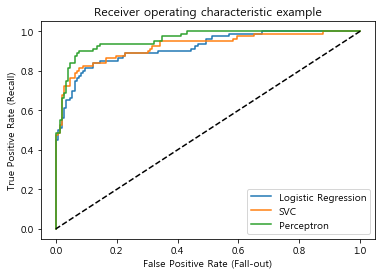

In [34]:
#roc커브 시각화
plt.title('Receiver operating characteristic example')
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='SVC')
plt.plot(fpr3, tpr3, label='Perceptron')
plt.legend()

plt.plot([1,0],[1,0],'k--',label='random gu ess') ## 수정해야됨

# GridSearchCV

In [35]:
from sklearn.feature_selection import SelectKBest
model_kbest = SelectKBest()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### cv: MLP

In [36]:
#파이프라인 생성
pipe_mlp = Pipeline([("kbest", model_kbest),('mlp',mlp)])
#파라미터 생성
params_mlp = {"kbest__k":[144], #변수갯수 144개
          "mlp__hidden_layer_sizes": [(50,30),(20,40,20),(30,50,30),(10,20,20,10),(20,40,40,20),(5,20,20,5)],
             "mlp__alpha":[0.00005,0.0001,0.0002,0.0003,0.0004],
             "mlp__activation":['logistic', 'tanh', 'relu'],
             "mlp__learning_rate":['constant', 'invscaling', 'adaptive']}
#최적모델 찾기
grid_search = GridSearchCV(pipe_mlp, param_grid = params_mlp,
                          cv=3, n_jobs=-1, verbose=1)
#
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
mlp_grid = grid_search.best_estimator_ #최적의 모델! 이미 fit되어있음
mlp_grid

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   37.4s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.0002,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(5, 20, 20, 5),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
                               momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [37]:
#학습과 예측
mlp_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_mlp_grid = mlp_grid.predict(sigungu_x_14scaled)
score(mlp_grid, sigungu_x_14scaled, sigungu_y.fire, pred_mlp_grid)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


f1 :		0.6555555555555554
accuracy :	0.7256637168141593
precision :	0.59
recall :	0.7375
[metric score]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklea

f1-score:(0.5559618655654585, array([0.54237288, 0.60377358, 0.52173913]))
accuracy:(0.7167251461988303, array([0.73684211, 0.74666667, 0.66666667]))
precision:(0.5243329850226403, array([0.51724138, 0.57575758, 0.48      ]))
recall:(0.5456966490299823, array([0.51851852, 0.67857143, 0.44      ]))
[kfold crossvalscore]

 None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted,0,1,All
True,,,
0,105,41,146
1,21,59,80
All,126,100,226


### cv: RFC

In [38]:
#파이프라인 생성
pipe_rfc = Pipeline([("kbest", model_kbest),('rfc',rfc)])
#파라미터 생성
params_rfc = {"kbest__k":[144],
          "rfc__max_depth": [10,15,20,25],
         "rfc__n_estimators": [10,200,300,400,500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_rfc, param_grid = params_rfc,
                          cv=3, n_jobs=-1, verbose=1)
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
#
rfc_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
rfc_grid

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.4s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('rfc',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=300, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [39]:
#학습과 예측
rfc_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_rfc_grid = rfc_grid.predict(sigungu_x_14scaled)
score(rfc_grid, sigungu_x_14scaled, sigungu_y.fire, pred_rfc_grid)

f1 :		0.7692307692307693
accuracy :	0.827433628318584
precision :	0.7303370786516854
recall :	0.8125
[metric score]

 None
f1-score:(0.4826451510836893, array([0.55813953, 0.48979592, 0.4       ]))
accuracy:(0.6988888888888889, array([0.75      , 0.64      , 0.70666667]))
precision:(0.5947368421052631, array([0.68421053, 0.6       , 0.5       ]))
recall:(0.39811287477954144, array([0.48148148, 0.39285714, 0.32      ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,122,24,146
1,15,65,80
All,137,89,226


### cv: xgb

In [40]:
#파이프라인 생성
pipe_xgb = Pipeline([("kbest", model_kbest),('xgb',xgb)])
#파라미터 생성
params_xgb = {"kbest__k":[144],
          "xgb__max_depth": [5,10,15,20,25],
         "xgb__learning_rate": [0.01,0.03,0.05,0.07],
         "xgb__n_estimators": [100,200,300,400,500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_xgb, param_grid = params_xgb,
                          cv=3, n_jobs=-1, verbose=0)###############RECALL
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
#
xgb_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
xgb_grid

Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.03,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=None,
                               n_estimators=400, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [41]:
#학습과 예측
xgb_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_xgb_grid = xgb_grid.predict(sigungu_x_14scaled)
#스코어
score(xgb_grid, sigungu_x_14scaled, sigungu_y.fire, pred_xgb_grid)

f1 :		0.5762711864406779
accuracy :	0.668141592920354
precision :	0.5257731958762887
recall :	0.6375
[metric score]

 None
f1-score:(0.4973426928588272, array([0.42553191, 0.58823529, 0.47826087]))
accuracy:(0.6815789473684211, array([0.64473684, 0.72      , 0.68      ]))
precision:(0.5586611456176674, array([0.5       , 0.65217391, 0.52380952]))
recall:(0.448694885361552, array([0.37037037, 0.53571429, 0.44      ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,100,46,146
1,29,51,80
All,129,97,226


### cv: lgbm

In [42]:
#파이프라인 생성
pipe_lgbm = Pipeline([("kbest", model_kbest),('lgbm',lgbm)])
#파라미터 생성
params_lgbm = {"kbest__k":[144],
          "lgbm__max_depth": [5,10,15,20,25],
         "lgbm__learning_rate": [0.01,0.03,0.05,0.07,0.001],
         "lgbm__n_estimators": [100,200,300,400,500],
              "lgbm__num_boost_round":[200,300,400,500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_lgbm, param_grid = params_lgbm,
                          cv=3, n_jobs=-1, verbose=1)
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
#
lgbm_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
lgbm_grid

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.2min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.01, max_depth=5,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_boost_round=200, num_leaves=31,
                                objective=None, random_state=None,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [43]:
#학습과 예측
lgbm_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_lgbm_grid = lgbm_grid.predict(sigungu_x_14scaled)
#스코어
score(lgbm_grid, lgbm_sigungu, sigungu_y.fire, pred_lgbm_grid)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


f1 :		0.5294117647058824
accuracy :	0.6460176991150443
precision :	0.5
recall :	0.5625
[metric score]

 None


C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use 

f1-score:(0.5032801839191886, array([0.44897959, 0.59574468, 0.46511628]))
accuracy:(0.6949122807017544, array([0.64473684, 0.74666667, 0.69333333]))
precision:(0.5974658869395711, array([0.5       , 0.73684211, 0.55555556]))
recall:(0.43580246913580245, array([0.40740741, 0.5       , 0.4       ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,101,45,146
1,35,45,80
All,136,90,226


### cv: lr

In [44]:
#파이프라인 생성
pipe_lr = Pipeline([("kbest", model_kbest),('lr',lr)])
#파라미터 생성
params_lr = {"kbest__k":[144],
          "lr__tol": [5,10,15,20,25],
         "lr__C": [0.005, 0.01,0.05],
            "lr__max_iter":[80,100,120]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_lr, param_grid = params_lr,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
#
lr_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
lr_grid

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('lr',
                 LogisticRegression(C=0.005, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=80,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=5, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [45]:
#학습과 예측
lr_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_lr_grid = lr_grid.predict(sigungu_x_14scaled)
#스코어
score(lr_grid, sigungu_x_14scaled, sigungu_y.fire, pred_lr_grid)

f1 :		0.0
accuracy :	0.6460176991150443
precision :	0.0
recall :	0.0
[metric score]

 None
f1-score:(0.0, array([0., 0., 0.]))
accuracy:(0.6460233918128654, array([0.64473684, 0.62666667, 0.66666667]))
precision:(0.0, array([0., 0., 0.]))
recall:(0.0, array([0., 0., 0.]))
[kfold crossvalscore]

 None


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision

Predicted,0,All
True,,
0,146,146
1,80,80
All,226,226


### cv: dtc

In [46]:
#파이프라인 생성
pipe_dtc = Pipeline([("kbest", model_kbest),('dtc',dtc)])
#파라미터 생성
params_dtc = {"kbest__k":[144],
          "dtc__max_depth": [5,10,15,20,25],
         "dtc__max_features": [50,80,100]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_dtc, param_grid = params_dtc,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
#
dtc_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
dtc_grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('dtc',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=25, max_features=80,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [47]:
#학습과 예측
dtc_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_dtc_grid = dtc_grid.predict(sigungu_x_14scaled)
#스코어
score(dtc_grid, sigungu_x_14scaled, sigungu_y.fire, pred_dtc_grid)

f1 :		0.5981308411214953
accuracy :	0.6194690265486725
precision :	0.47761194029850745
recall :	0.8
[metric score]

 None
f1-score:(0.4626696832579185, array([0.50980392, 0.46153846, 0.41666667]))
accuracy:(0.6946198830409357, array([0.71052632, 0.62666667, 0.74666667]))
precision:(0.45719712386379047, array([0.42857143, 0.46153846, 0.48148148]))
recall:(0.4280776014109347, array([0.51851852, 0.28571429, 0.48      ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,76,70,146
1,16,64,80
All,92,134,226


### cv: pcp

In [48]:
#파이프라인 생성
pipe_pcp = Pipeline([("kbest", model_kbest),('pcp',pcp)])
#파라미터 생성
params_pcp = {"kbest__k":[144],
          "pcp__alpha": [0.0001, 0.0003, 0.0005],
         "pcp__tol": [0.001,0.003, 0.005],
         "pcp__max_iter": [200,300,400,500]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_pcp, param_grid = params_pcp,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
#
pcp_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
pcp_grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('pcp',
                 Perceptron(alpha=0.0001, class_weight=None,
                            early_stopping=False, eta0=1.0, fit_intercept=True,
                            max_iter=200, n_iter_no_change=5, n_jobs=None,
                            penalty=None, random_state=0, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False))],
         verbose=False)

In [49]:
#학습과 예측
pcp_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_pcp_grid = pcp_grid.predict(sigungu_x_14scaled)
#스코어
score(pcp_grid, sigungu_x_14scaled, sigungu_y.fire, pred_pcp_grid)

f1 :		0.5957446808510638
accuracy :	0.7477876106194691
precision :	0.6885245901639344
recall :	0.525
[metric score]

 None
f1-score:(0.2883116883116883, array([0.42857143, 0.13333333, 0.3030303 ]))
accuracy:(0.6769590643274853, array([0.68421053, 0.65333333, 0.69333333]))
precision:(0.7416666666666667, array([0.6  , 1.   , 0.625]))
recall:(0.20158730158730162, array([0.33333333, 0.07142857, 0.2       ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,127,19,146
1,38,42,80
All,165,61,226


### cv: svc

In [50]:
#파이프라인 생성
pipe_svc = Pipeline([("kbest", model_kbest),('svc',svc)])
#파라미터 생성
params_svc = {"kbest__k":[144],
          "svc__C": [400,500,700,800,900,1000],
         "svc__cache_size": [5,10,20,30,50,70,100],
         "svc__tol": [0.001,0.003,0.005,0.001,0.0005,0.0003],
             "svc__gamma":[0.0001,0.0003,0.0005,0.001,0.005]}
#최적모델 찾기
grid_search = GridSearchCV(pipe_svc, param_grid = params_svc,
                          cv=3, n_jobs=-1, verbose=0)
grid_search.fit(sigungu_x_15scaled, sigungu_y.fire)
#
svc_grid = grid_search.best_estimator_#최적의 모델! 이미 fit되어있음
svc_grid

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=144,
                             score_func=<function f_classif at 0x000000001BC5D1E0>)),
                ('svc',
                 SVC(C=1000, cache_size=5, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [51]:
#학습과 예측
svc_grid.fit(sigungu_x_15scaled, sigungu_y.fire)
pred_svc_grid = svc_grid.predict(sigungu_x_14scaled)
#스코어
score(svc_grid, sigungu_x_14scaled, sigungu_y.fire, pred_svc_grid)

f1 :		0.6705202312138728
accuracy :	0.7477876106194691
precision :	0.6236559139784946
recall :	0.725
[metric score]

 None
f1-score:(0.5719626936192942, array([0.63157895, 0.6557377 , 0.42857143]))
accuracy:(0.7078947368421052, array([0.72368421, 0.72      , 0.68      ]))
precision:(0.5784907902554961, array([0.6       , 0.60606061, 0.52941176]))
recall:(0.5803174603174602, array([0.66666667, 0.71428571, 0.36      ]))
[kfold crossvalscore]

 None


Predicted,0,1,All
True,,,
0,111,35,146
1,22,58,80
All,133,93,226
